# Sojern Take Home Project

- Steven L. Byrd
- 43 Harrington st.
- San Francisco, CA 94112
- (303)-475-3770
- byrdsl@gmail.com
- http://www.linkedin.com/in/stevenlbyrd
- http://www.github.com/byrdsl1999

# Summary

- Data is explored and cleaned.
    - We examine the data with several statistics and plots.
    - Rows containing NaNs are removed.
- We add several metrics
    - CTR/Click through rate (clicks/impressions)
    - CPC/Cost per click (spend/click)
    - CPI/Cost per impression (spend/impression)
    - Inf values are replaced with MAX values.
- Keywords perform differenlty across all metrics
    - Box-plots visually suggest diffent performance of metrics.
    - One-way anovas demonstrate statistically significant diffences in CTR, CPC, and CPI.
- CTR and CPI are different in US a UK markets. Evidence of greater granularity in data.
    - T-tests suggest differences in all 3 metrics between markets.
    - However, non-parametric U-test suggest only differences between CTR and CPI. This test is preferrable in this instance.
    - When looking at a particular keyword however, a U-test found differences between US and UK.
    - This tells us that what market we are in should be considered when comparing keywords.
- There is insufficient data to suggest keywords to remove.
    - We can, however, list the words in the order priority in which they should be removed.
    - A small tool is able to recommend words for removal depending on the value of a click.
- It is recommended that bids be raised on a number of the keywords. 
    - It is also recommended that a number of the bids be lowered.
    - The reasoning is based on a linear regression of ad rank on CTR.
    - When a lower ad rank increases CTR, a decrease in bid is recommended. If a higher ad rank leads to higher CTR, then an increase in bid is recommended.
- Future directions of study are recommended.

## Importing Data and Libraries

In [440]:
# navigate to data location
cd /home/steven/Downloads/

/home/steven/Downloads


In [443]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import ipywidgets
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [442]:
# import data
data=pd.read_csv("data_challenge.csv")

## Initial Data Exploration

In [309]:
data.shape

(3916, 9)

In [310]:
data.dtypes

date                        object
country                     object
keyword                     object
global_monthly_searches    float64
ad_position                float64
daily_clicks               float64
daily_cost                 float64
local_monthly_searches     float64
impressions                  int64
dtype: object

In [483]:
#data.sort_values(by='impressions', ascending=False).head(10)
data.head()

,date,country,keyword,global_monthly_searches,ad_position,daily_clicks,daily_cost,local_monthly_searches,impressions
0,2011-12-25,UK,financial services,4090000.0,1.0,8.0,234.22,246000.0,4757
1,2011-12-25,UK,certificate of deposit,1830000.0,1.0,148.0,159.49,201000.0,60635
2,2011-12-25,UK,joint account,201000.0,1.0,1.0,0.20,8100.0,26
3,2011-12-25,UK,insurance,33100.0,1.0,28.0,490.98,6600.0,34975
4,2011-12-25,UK,checking account,450000.0,1.0,50.0,133.00,33100.0,16997


In [484]:
data.describe(include='all')

,date,country,keyword,global_monthly_searches,ad_position,daily_clicks,daily_cost,local_monthly_searches,impressions
count,3916,3916,3916,3.896000e+03,3898.000000,3916.000000,3900.00000,3.916000e+03,3.916000e+03
unique,156,2,19,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-01-12,US,certificate of deposit,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,2224,330,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.247633e+06,1.017731,737.821502,4042.45178,9.838095e+05,6.587655e+07
std,NaN,NaN,NaN,6.072622e+06,0.023904,1918.515192,13628.77784,2.478468e+06,3.031724e+08
min,NaN,NaN,NaN,0.000000e+00,1.000000,0.000000,0.10000,0.000000e+00,2.600000e+01
25%,NaN,NaN,NaN,3.310000e+04,1.000000,7.000000,30.20000,5.400000e+03,7.702500e+02
50%,NaN,NaN,NaN,2.010000e+05,1.000000,78.000000,186.49500,1.100000e+05,4.708950e+04
75%,NaN,NaN,NaN,1.830000e+06,1.050000,318.250000,922.90250,3.010000e+05,5.483572e+05


In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 9 columns):
date                       3916 non-null object
country                    3916 non-null object
keyword                    3916 non-null object
global_monthly_searches    3896 non-null float64
ad_position                3898 non-null float64
daily_clicks               3916 non-null float64
daily_cost                 3900 non-null float64
local_monthly_searches     3916 non-null float64
impressions                3916 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 275.4+ KB


In [486]:
data.date.unique()[:10]

array(['2011-12-25', '2011-12-26', '2011-12-27', '2011-12-28',
       '2011-12-29', '2011-12-31', '2012-01-01', '2012-01-02',
       '2012-01-03', '2012-01-04'], dtype=object)

In [487]:
#Unused, but added for good measure.
data.date=pd.to_datetime(data.date)

In [488]:
print(data.country.unique())
print(data.keyword.unique())

['UK' 'US']
['financial services' 'certificate of deposit' 'joint account' 'insurance'
 'checking account' 'consolidate loans' 'minimum balance' 'banking careers'
 'lawyer' 'loans' 'mortgage' 'rewards card' 'overdraft fee' 'debit'
 'credit cards' 'atm' 'wire transfer' 'bankruptcy' 'interest rate']


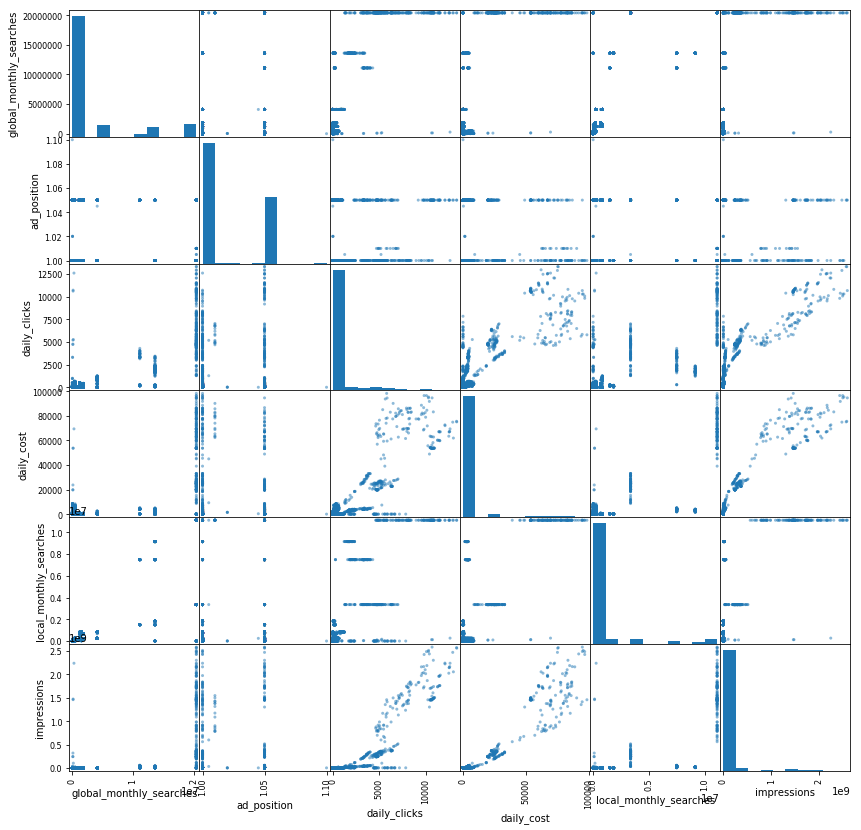

In [489]:
pd.plotting.scatter_matrix(data, figsize=(14,14))
plt.show()

# Data Cleaning/Modifiation

Dropping na values. Other options could be replacing with mean, or a grouped mean. Dropping seems appropriate because there is sufficient data.

In [490]:
data=data.dropna()

### Add new columns with some other useful metrics

- Click through Rate(clicks per impression)
- Add Cost per click(Spend per click)
- Add Cost per impression(Spend per impression)
    This is a less impactful metric, but since impressions have some value it may still be worth tracking.

In [491]:
#Click through rate
data['CTR']=data['daily_clicks']/data['impressions']

#Cost per Click
data['CPC']=data['daily_cost']/data['daily_clicks']

#Cost per impression
data['CPI']=data['daily_cost']/data['impressions']

#The warning here is noted, but for time considerations not addressed.

/home/steven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/steven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/steven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [492]:
#Set inf values to max.
data.CTR[data.impressions==0]=np.nanmax(data['CTR'])
data.CPC[data.daily_clicks==0]=max(data.CPC[data.CPC != np.inf])
data.CPC[data.impressions==0]=max(data.CPI[data.CPI != np.inf])

#The warning here is noted, but for time considerations not addressed.

/home/steven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/steven/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/steven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/steven/anaconda3/l

In [507]:
data.head()

,date,country,keyword,global_monthly_searches,ad_position,daily_clicks,daily_cost,local_monthly_searches,impressions,CTR,CPC,CPI
0,2011-12-25,UK,financial services,4090000.0,1.0,8.0,234.22,246000.0,4757,0.001682,29.277500,0.049237
1,2011-12-25,UK,certificate of deposit,1830000.0,1.0,148.0,159.49,201000.0,60635,0.002441,1.077635,0.002630
2,2011-12-25,UK,joint account,201000.0,1.0,1.0,0.20,8100.0,26,0.038462,0.200000,0.007692
3,2011-12-25,UK,insurance,33100.0,1.0,28.0,490.98,6600.0,34975,0.000801,17.535000,0.014038
4,2011-12-25,UK,checking account,450000.0,1.0,50.0,133.00,33100.0,16997,0.002942,2.660000,0.007825


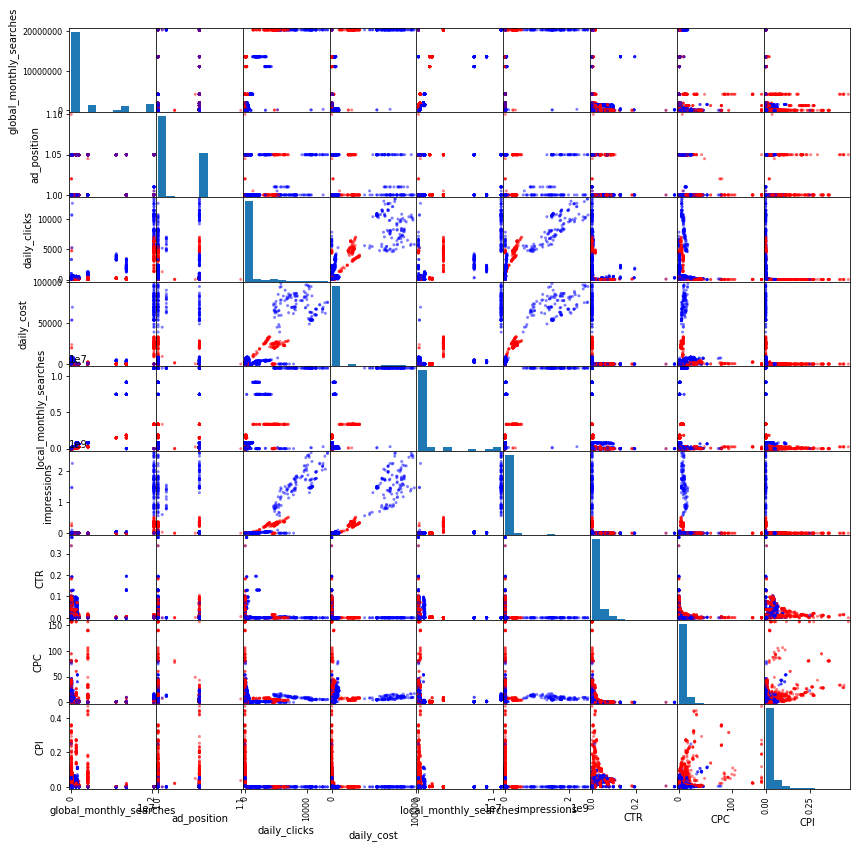

In [494]:
colMap={"UK":"red", "US":"blue"}
cols=list(map(lambda x:colMap.get(x), data.country))

pd.plotting.scatter_matrix(data, figsize=(14,14), c=cols)
plt.show()

The discrete measures appear to possibly to be from poissoin distribution family. The continuous from the chi-square family.

In some of the pairing there appears to be some clear differentiation of US and UK data(eg daily clicks x impressions). Many of these seem as though they could be largely drive by a smaller UK market, and therefor fewer overall interactions with ads.

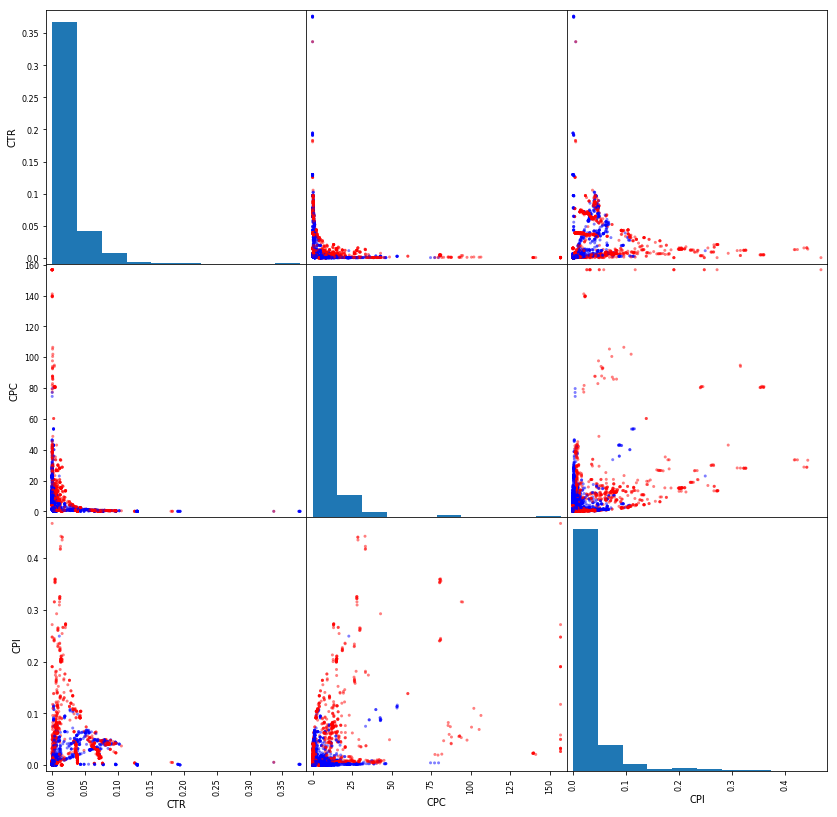

In [495]:
colorMap={'UK':'red', 'US':'blue'}
pd.plotting.scatter_matrix(data[['country', 'CTR', 'CPC', 'CPI']], figsize=(14,14), c=cols)
plt.show()

# Are there differences in how the keywords perform?

There do appear to be differences in keyword performance accross all metrics. This is visually apparent from the following boxplots. A series of ANOVA's also demonstrate statistically significant differences.

/home/steven/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


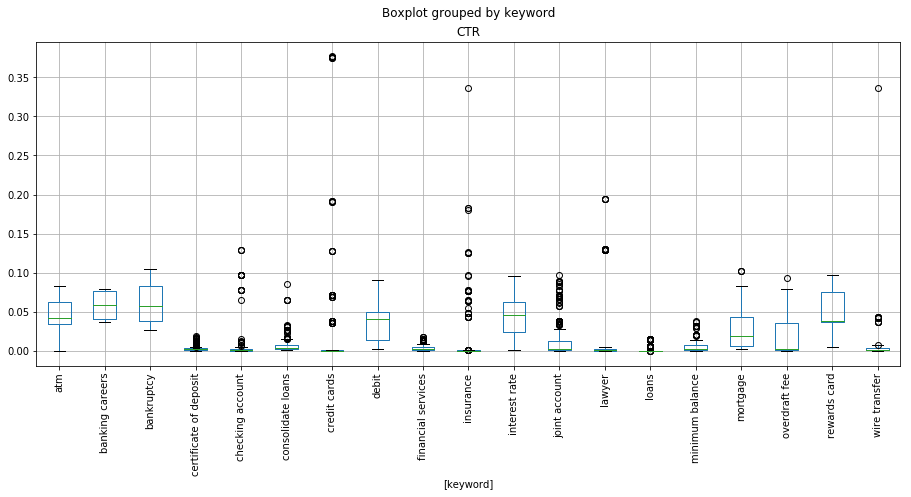

In [496]:
data.boxplot(column="CTR", by=["keyword"], figsize=[15,6])
plt.xticks(rotation=90)
plt.show()

In [497]:
ctrByKeyword=[data.CTR[data.keyword==keyword].tolist() for keyword in keywords]
stats.f_oneway(ctrByKeyword[0], ctrByKeyword[1], ctrByKeyword[2], ctrByKeyword[3],
               ctrByKeyword[4], ctrByKeyword[5], ctrByKeyword[6], ctrByKeyword[7],
               ctrByKeyword[8], ctrByKeyword[9], ctrByKeyword[6], ctrByKeyword[1],
               ctrByKeyword[12], ctrByKeyword[13], ctrByKeyword[14], ctrByKeyword[15],
               ctrByKeyword[16], ctrByKeyword[17], ctrByKeyword[18])

F_onewayResult(statistic=77.810590176263858, pvalue=1.7201816294360497e-245)

The low p-value suggests differences between keywords in CTR.

/home/steven/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


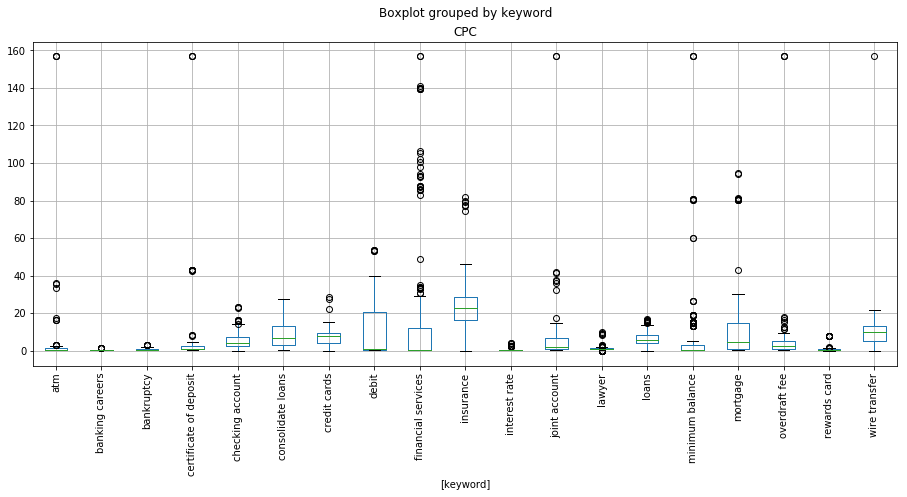

In [498]:
data.boxplot(column="CPC", by=["keyword"], figsize=[15,6])
plt.xticks(rotation=90)
plt.show()

In [499]:
cpcByKeyword=[data.CPC[data.keyword==keyword].tolist() for keyword in keywords]
stats.f_oneway(cpcByKeyword[0], cpcByKeyword[1], cpcByKeyword[2], cpcByKeyword[3],
               cpcByKeyword[4], cpcByKeyword[5], cpcByKeyword[6], cpcByKeyword[7],
               cpcByKeyword[8], cpcByKeyword[9], cpcByKeyword[6], cpcByKeyword[1],
               cpcByKeyword[12], cpcByKeyword[13], cpcByKeyword[14], cpcByKeyword[15],
               cpcByKeyword[16], cpcByKeyword[17], cpcByKeyword[18])

F_onewayResult(statistic=29.475194925098577, pvalue=9.8329045224566583e-95)

Visually we can see that there is a fair amount of difference between the different search terms.

Note that there is an outlier equal to the maximum value seen. This is an artifact of the way 'inf' values were handled, and can be largely ignored.

The low p-value suggests differences between keywords in CPC.

/home/steven/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


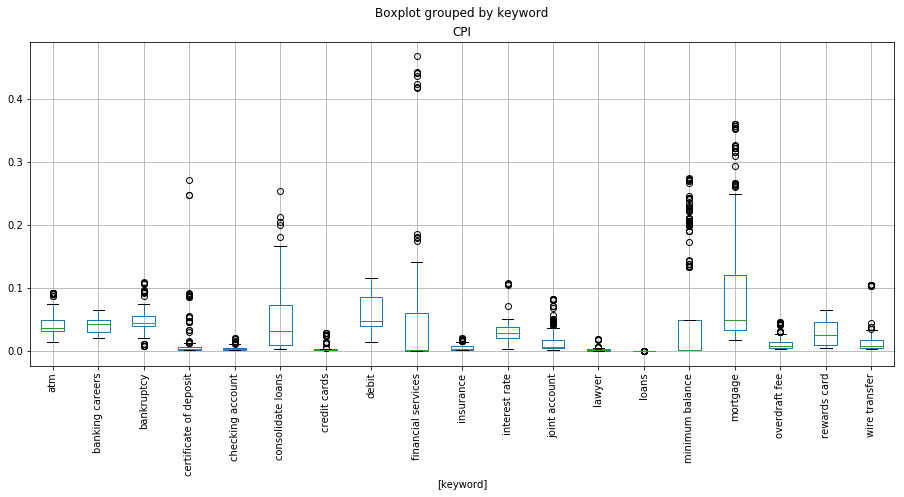

In [500]:
data.boxplot(column="CPI", by=["keyword"], figsize=[15,6])
plt.xticks(rotation=90)
plt.show()

In [501]:
cpiByKeyword=[data.CPI[data.keyword==keyword].tolist() for keyword in keywords]
stats.f_oneway(cpiByKeyword[0], cpiByKeyword[1], cpiByKeyword[2], cpiByKeyword[3],
               cpiByKeyword[4], cpiByKeyword[5], cpiByKeyword[6], cpiByKeyword[7],
               cpiByKeyword[8], cpiByKeyword[9], cpiByKeyword[6], cpiByKeyword[1],
               cpiByKeyword[12], cpiByKeyword[13], cpiByKeyword[14], cpiByKeyword[15],
               cpiByKeyword[16], cpiByKeyword[17], cpiByKeyword[18])

F_onewayResult(statistic=50.775115138880707, pvalue=4.9371045242525118e-164)

The low p-value suggests differences between keywords in CPC.

# Is there a difference between US and UK performance?

In [502]:
print("CTR: ", stats.ttest_ind(data.CTR[data.country=="UK"], data.CTR[data.country=="US"]))
print("CPC: ", stats.ttest_ind(data.CPC[data.country=="UK"], data.CPC[data.country=="US"]))
print("CPI: ", stats.ttest_ind(data.CPI[data.country=="UK"], data.CPI[data.country=="US"]))

CTR:  Ttest_indResult(statistic=7.4461918285754463, pvalue=1.1784917515538081e-13)
CPC:  Ttest_indResult(statistic=8.0999967653679352, pvalue=7.3015158914151113e-16)
CPI:  Ttest_indResult(statistic=20.318372045675346, pvalue=2.7937038815816006e-87)


These results tell us that across all metrics, the US and UK markets are performing differently(specifically the low pvalue. Formally we could use 0.05 as the cutoff, but I think in this context having a less formal standard is preferable). However, if we refer to the distribution plot done previously, we can see that the assumption of normal distribution may have been violated. To address this we will try the non-parametric U-test.

In [503]:
print("CTR: ", stats.mannwhitneyu(data.CTR[data.country=="UK"], data.CTR[data.country=="US"]))
print("CPC: ", stats.mannwhitneyu(data.CPC[data.country=="UK"], data.CPC[data.country=="US"]))
print("CPI: ", stats.mannwhitneyu(data.CPI[data.country=="UK"], data.CPI[data.country=="US"]))

CTR:  MannwhitneyuResult(statistic=1152476.5, pvalue=5.5355011679465671e-87)
CPC:  MannwhitneyuResult(statistic=1823581.0, pvalue=0.42816094249350389)
CPI:  MannwhitneyuResult(statistic=1000475.5, pvalue=2.7878332915185297e-129)


Results from the U-test show us a significant difference between CTR and CPI, but not for CPC. We are thus unable to see a difference between the overall campaigns in terms of CPC. If we were to break down the tests between keywords, we are likely to see differences, such as below, where we compare the keyword 'atm' between UK and US markets.

In [504]:
print("CPC: ", stats.mannwhitneyu(data.CPC[data.country=="UK"][data.keyword=="atm"], data.CPC[data.country=="US"][data.keyword=="atm"]))

CPC:  MannwhitneyuResult(statistic=1309.0, pvalue=2.518158046491844e-08)


We can see here, that even though we found no difference between UK and US overall in CPC, at a more granular level we are still able to see differences. A full exploration of these differences may be warranted.

## Should keywords be removed?

Keywords should be removed when the cost of their use is greater than the value of whatever benefit is gained from their use, or if those costs could be more efficiently applied elsewhere. This information is provided here, so we cannot say if any keywords should be removed. We can, however, rank the keywords in terms of their value. 

In this case, CTR is not considered because it does not directly lead to value. Value is generated by clicks, regardless of how many impressions they take.

In [505]:
tmp=data.groupby(by=['keyword', 'country'])['CTR', 'CPC', 'CPI'].mean()

In [506]:
def f(clickValue, impressionValue):
    tmp['click value']=clickValue
    tmp['impression value']=impressionValue
    tmp['revenue per click']=tmp['click value']-tmp['CPC']
    tmp['revenue per impression']=tmp['impression value']-tmp['CPI']
    return tmp[['click value', 'impression value', 'revenue per click', 'revenue per impression']].sort_values(by='revenue per click')
ipywidgets.interact(f, clickValue=(0,30,1), impressionValue=(0, 0.15,0.005))

A Jupyter Widget

<function __main__.f>

The above tool allows you to determine which keywords should be gotten rid of in different markets. For a given value of a click, it allows you to determine if that keyword is a net positive or negative towards revenue to retain.

It is quite possible that the revenue of a click varies between keyword, in which case this approach should take that into consideration.

If there is much value to be gained from impressions, it is possible to see if a high revenue per impression may outweigh a lower revenue per click.

# Which keywords should have their bid increased?



If you compare these thress key words, it appears that there are three cases. There is a positive slope(eg. 'bankruptcy'), a negative slope(eg. 'insurance'), and a zero slope. If there is a positive slope, a lower ad position leads to a higher CTR, and we can therefore decrease our bid. If there is a negative slope, then a higher ad position will lead to a higher CTR, and we should therefore increase our bid. If there is no slope, ad postion is having no impact on CTR, and we should either take no action, or decrease our bid until we begin to see a drop off of CTR.

We will now perform a series of ANOVA's to see which key words have statistically significant slopes, and whether or not they are positive or negative.

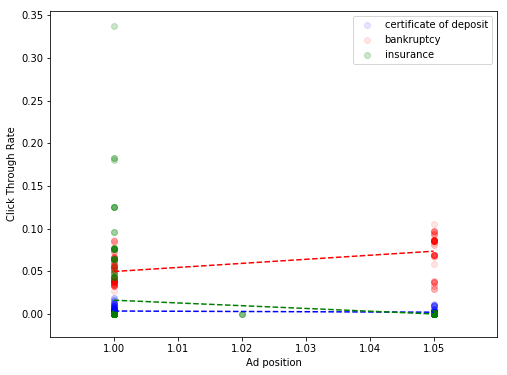

In [648]:
first ='certificate of deposit'
second = 'bankruptcy' #Checking account
third = 'insurance'

plt.figure(figsize=[8,6])
plt.ylabel('Click Through Rate')
plt.xlabel('Ad position')

plt.scatter(x=data.ad_position[data.keyword==first], y=data.CTR[data.keyword==first], c='b', alpha=.1, label=first)
plt.scatter(x=data.ad_position[data.keyword==second], y=data.CTR[data.keyword==second], c='r', alpha=.1, label=second)
plt.scatter(x=data.ad_position[data.keyword==third], y=data.CTR[data.keyword==third], c='g', alpha=.2, label=third)
plt.legend(loc='upper right');

z1 = np.polyfit(data.ad_position[data.keyword==first], data.CTR[data.keyword==first], 1)
p = np.poly1d(z1)
plt.plot(data.ad_position[data.keyword==first],p(data.ad_position[data.keyword==first]),"b--")

z2 = np.polyfit(data.ad_position[data.keyword==second], data.CTR[data.keyword==second], 1)
p = np.poly1d(z2)
plt.plot(data.ad_position[data.keyword==second],p(data.ad_position[data.keyword==second]),"r--")

z3 = np.polyfit(data.ad_position[data.keyword==third], data.CTR[data.keyword==third], 1)
p = np.poly1d(z3)
plt.plot(data.ad_position[data.keyword==third],p(data.ad_position[data.keyword==third]),"g--")

plt.show()


In [645]:
alpha = 0.05
for keyword in data.keyword.unique():
    model = ols("CTR ~ ad_position", data[data.keyword==keyword]).fit()
    print('"'+str(keyword)+'"') 
    print("p-value: "+ str(model.pvalues[1]))
    if model.pvalues[1] < alpha:
        print("Slope significant.")
        print("Slope:",model.params[1])
        if model.params[1] < 0:
            print("Suggest INCREASING bid.")
        if model.params[1] > 0:
            print("Suggest DECREASING bid.")

    else:
        print("Slope not significant.")
        print('Suggest NO CHANGE in bid')
    print()

"financial services"
p-value: 0.105248555548
Slope not significant.
Suggest NO CHANGE in bid

"certificate of deposit"
p-value: 0.000113916445204
Slope significant.
Slope: -0.0278767001571
Suggest INCREASING bid.

"joint account"
p-value: 0.175830703977
Slope not significant.
Suggest NO CHANGE in bid

"insurance"
p-value: 6.27971462069e-05
Slope significant.
Slope: -0.322541129943
Suggest INCREASING bid.

"checking account"
p-value: 0.00108380836706
Slope significant.
Slope: -0.171327928929
Suggest INCREASING bid.

"consolidate loans"
p-value: 0.555248655302
Slope not significant.
Suggest NO CHANGE in bid

"minimum balance"
p-value: 0.187419951771
Slope not significant.
Suggest NO CHANGE in bid

"banking careers"
p-value: 1.55617346293e-15
Slope significant.
Slope: 0.0289251048046
Suggest DECREASING bid.

"lawyer"
p-value: 0.000964875884855
Slope significant.
Slope: -0.259282800462
Suggest INCREASING bid.

"loans"
p-value: 7.45316337021e-06
Slope significant.
Slope: -0.0372174641297
Su

##  Based on the above test we make the following recommendations

#### Lower the following bids
- "banking careers"
- "mortgage"
- "atm"
- "bankruptcy"

#### Raise the following bids
- "certificate of deposit"
- "insurance"
- "checking account"
- "lawyer"
- "loans"
- "overdraft fee"
- "credit cards"
- "interest rate"

Make no change to the other key words.

# Future directions
- Examine temporal factors
    - overall trends in time(eg changes in longterm keyword efficacy)
    - cyclical paterns(eg day of week)
- Account for temporal correlation and independence of data points